# **Pride and Joy**
### *An investigation of mental health correlates in LGBQ+ people*
| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Emily K. Sanders| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |Capstone Project|
|DSB-318| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |June 13, 2024|
---

## Prior Notebooks Summary

In the previous notebook, I finished preparing the data for modeling

In this notebook, I will conduct exploratory data analysis, primarily through the creation of graphs, to guide my decisions when modeling.  I have included some of the `python` code I used to do this in this notebook, but the vast majority of my plots were created via my custom function, `autoplots()`.  The execution of this function can be seen in the cells below, and interested readers can review the function itself in the [*Appendix*](./z_Appendix_Function_Definitions.ipynb) notebook.

## Table of Contents

- [Exploratory Data Analyses](##Exploratory-Data-Analyses)
  - [Imports](###Imports)
  - [Summary Statistics](###Summary-Statistics)
  - [Correlations](###Correlations)
  - [Selected Graphs](###Selected-Graphs)
- [Notebook Summary](##Notebook-Summary)  

## Exploratory Data Analysis

### Imports

In [49]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from warnings import simplefilter

# Import my own functions from a .py file
from emilys_functions import my_date, autoplots

In [50]:
# Settings preferences
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
# Thanks to daydaybroskii and KingOtto at Stack Overflow for that one
# https://stackoverflow.com/questions/68292862/performancewarning-dataframe-is-highly-fragmented-this-is-usually-the-result-o
plt.rcParams.update({'figure.max_open_warning': 0})
# Thanks to Luan Nico at Stack Overflow for that one
# https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output

In [51]:
# Import the dataframe from the previous notebook
meyer = pd.read_csv('../02_data/df_after_data_preparation_part_2.csv')
meyer.shape

(1494, 131)

### Summary Statistics

In [52]:
meyer.describe()

studyid  w1kessler6_i  abus_treat_non_queer  \
count  1.494000e+03   1494.000000           1494.000000   
mean   1.590061e+08      7.666667              0.635207   
std    5.726143e+06      5.469394              0.934631   
min    1.513398e+08      0.000000              0.000000   
25%    1.547582e+08      3.000000              0.000000   
50%    1.570744e+08      7.000000              0.000000   
75%    1.628398e+08     12.000000              1.000000   
max    1.766200e+08     24.000000              6.000000   

       abus_treat_sex_gender  abusive_treatment  bad_neighbhd  \
count            1494.000000        1494.000000   1494.000000   
mean                0.392236           5.788487      1.342704   
std                 0.605926           4.863244      1.553799   
min                 0.000000           0.000000      0.000000   
25%                 0.000000           2.000000      0.000000   
50%                 0.000000           5.000000      1.000000   
75%                 1.000000           9.000000      3.000000   
max                 3.000000          18.000000      4.000000   

       childhd_bullying_non_queer  childhd_bullying_sex_gender  \
count                 1494.000000                  1494.000000   
mean                     0.997323                     0.406292   
std                      1.033268                     0.604948   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      1.000000                     0.000000   
75%                      2.000000                     1.000000   
max                      6.000000                     2.000000   

       chronic_strain       cohort  daily_discr_non_queer  \
count     1494.000000  1494.000000            1494.000000   
mean         6.836011     1.870147               0.614458   
std          3.922459     0.859449               0.815920   
min          0.000000     1.000000               0.000000   
25%          4.000000     1.000000               0.000000   
50%          6.000000     2.000000               0.000000   
75%          9.000000     3.000000               1.000000   
max         22.000000     3.000000               3.000000   

       daily_discr_sex_gender     disabled      gcendiv      gcenreg  \
count             1494.000000  1494.000000  1494.000000  1494.000000   
mean                 0.820616     0.373494     5.331325     2.708166   
std                  1.007648     0.483894     2.626695     1.079791   
min                  0.000000     0.000000     1.000000     1.000000   
25%                  0.000000     0.000000     3.000000     2.000000   
50%                  1.000000     0.000000     5.000000     3.000000   
75%                  1.000000     1.000000     8.000000     4.000000   
max                  5.000000     1.000000     9.000000     4.000000   

            geduc1       geduc2   geducation  gmilesaway2_ei_r     gurban_i  \
count  1494.000000  1494.000000  1494.000000       1494.000000  1494.000000   
mean      2.466533     1.801205     4.228246          0.749665     0.881526   
std       1.014901     0.399227     1.383853          0.433351     0.323277   
min       1.000000     1.000000     1.000000          0.000000     0.000000   
25%       2.000000     2.000000     4.000000          0.250000     1.000000   
50%       2.000000     2.000000     4.000000          1.000000     1.000000   
75%       3.000000     2.000000     5.000000          1.000000     1.000000   
max       4.000000     2.000000     6.000000          1.000000     1.000000   

       health_insurance  housing_disc_non_queer  housing_disc_sex_gender  \
count       1494.000000             1494.000000              1494.000000   
mean           0.913655                0.018742                 0.007363   
std            0.280967                0.178321                 0.093022   
min            0.000000                0.000000                 0.000000   
25%     

These summary statistics are a bit unwieldy to interpret with so many features in the dataset, but I found them useful to refer back to whenever I had a question about a feature.

### Correlations

Creating a correlation matrix of all the variables is a helpful way to assess which features are likely to be predictive of the target.  With so many features, this chart is also very large and unwieldy, but I looked at the top and bottom of the `w1kessler6_1` column to identify variables that were strongly related with the the target, either positively or negatively.

Because so many of my features are categorical, binary, or ordinal, the Pearson's correlations presented below are not entirely mathematically legitimate for all of them.  Many of these variables would be better assessed with t-tests or chi-squared tests.  However, even in those cases, correlations are still a useful heuristic tool to quickly assess whether the target variable varies over different levels of the predictor.

In [53]:
# Generate a correlation matrix
meyer_corr = meyer.corr()

# When dealing with large datasets, I find it easier to view the correlation matrix in a CSV
meyer_corr.to_csv('../02_data/meyer_corr.csv', index = True)

# For those who prefer to view it in-text
meyer_corr.sort_values(by = 'w1kessler6_i', ascending = False)

studyid  w1kessler6_i  abus_treat_non_queer  \
w1kessler6_i                    0.103906      1.000000              0.216893   
w1q72_ei                        0.093322      0.712755              0.173852   
chronic_strain                  0.074053      0.525705              0.268685   
suicidality                     0.037701      0.486531              0.201423   
w1everyday_i                    0.116535      0.478825              0.386602   
w1q03_ei                        0.074818      0.475437              0.139493   
w1q119_ei                       0.027434      0.397033              0.155995   
disabled                        0.020363      0.369491              0.174096   
stress_past_year_gen            0.120155      0.321832              0.183588   
stress_past_year_interpersonal  0.074034      0.311920              0.186764   
w1weight_full                   0.021940      0.288530              0.106148   
childhd_bullying_non_queer      0.049385      0.285710              0.399175   
daily_discr_sex_gender          0.031268      0.271463              0.397017   
w1sexminid                      0.032715      0.260960              0.125592   
w1ace_i                         0.080653      0.259967              0.214870   
stress_past_year_non_queer      0.086263      0.253042              0.467872   
w1poverty_i_ei                  0.033676      0.252827              0.163186   
stress_past_year_work           0.097185      0.240119              0.183495   
w1ace_men_i                    -0.016430      0.239890              0.131088   
abusive_treatment               0.000728      0.221233              0.281561   
w1dudit_i                       0.083365      0.217928              0.118060   
w1ace_emo_i                     0.034630      0.217761              0.142144   
w1hcthreat_i                    0.038353      0.216954              0.109845   
abus_treat_non_queer            0.070119      0.216893              1.000000   
w1q175_ei                       0.066736      0.216494              0.125610   
w1sexualid                      0.033376      0.213416              0.119988   
w1q74_23_ei                     0.014447      0.212496              0.114028   
w1feltstigma_i                  0.020497      0.211140              0.129858   
daily_discr_non_queer           0.154620      0.209677              0.379328   
bad_neighbhd                    0.016558      0.195985              0.103208   
childhd_bullying_sex_gender     0.027719      0.182663              0.230326   
stress_past_year_sex_gender     0.088783      0.171219              0.260320   
w1q171_7_ei                     0.044250      0.168169              0.035149   
w1ace_inc_i                     0.120545      0.158499              0.157899   
w1q36_ei                        0.023496      0.153050              0.049634   
stress_past_year_crime          0.012945      0.152831              0.184681   
abus_treat_sex_gender           0.009527      0.150637              0.379378   
work_disc_non_queer             0.023757      0.145423              0.376324   
w1ace_phy_i                     0.012412      0.142650              0.159626   
w1internalized_i                0.039330      0.138417              0.115752   
w1ace_ipv_i                     0.050567      0.126174              0.115667   
w1q30_4_ei                     -0.006128      0.123951              0.047764   
w1q140_ei                       0.017340      0.116788              0.130230   
w1ace_sep_i                     0.040752      0.115438              0.067064   
w1ace_sub_i                     0.059729      0.113764              0.096371   
work_neg_outcomes               0.024897      0.110214              0.179774   
w1q171_9_ei                    -0.060398      0.108269              0.088733   
w1q171_2_ei                     0.035786      0.105852              0.043114   
studyid                         1.000000      0.103906              0.070119   
work_disc_sex_gender            0

In [54]:
# Again for the negative correlations
meyer_corr.sort_values(by = 'w1kessler6_i', ascending = True)

studyid  w1kessler6_i  abus_treat_non_queer  \
w1lifesat_i                    -0.089173     -0.525031             -0.155116   
w1q01_ei                       -0.045544     -0.507901             -0.132379   
w1socialwb_i                   -0.119839     -0.494476             -0.150177   
w1pinc_i                       -0.061955     -0.403028             -0.145189   
cohort                         -0.104267     -0.367859             -0.110708   
w1age                          -0.106230     -0.365917             -0.111001   
w1povertycat_i_ei              -0.063915     -0.348310             -0.194027   
w1hinc_i                       -0.057597     -0.338203             -0.156626   
w1q162_ei                      -0.008722     -0.300843             -0.185993   
geduc1                         -0.026410     -0.291846             -0.095848   
geducation                     -0.020769     -0.277191             -0.091457   
w1socsupport_i                 -0.039249     -0.246074             -0.100014   
w1socsupport_fam_i             -0.029786     -0.233671             -0.112835   
w1q33_ei                       -0.055828     -0.215486             -0.071977   
w1socsupport_fr_i              -0.038420     -0.210511             -0.073170   
w1q171_1_ei                    -0.042808     -0.191669             -0.103553   
outness                        -0.015169     -0.188888             -0.099369   
geduc2                         -0.003236     -0.185275             -0.031132   
w1q69_ei                       -0.089525     -0.164011             -0.134189   
w1q52_ei                       -0.089860     -0.159361             -0.055668   
w1socsupport_so_i              -0.028389     -0.157687             -0.057081   
waveparticipated               -0.354735     -0.146066             -0.106925   
w1q37_ei                       -0.024446     -0.126279             -0.030462   
w1q89_ei                       -0.007643     -0.125798             -0.089613   
w1q38_ei                       -0.048573     -0.117994             -0.027302   
w1q179_ei_r_relig_christ        0.020940     -0.116649             -0.024347   
w1sex                          -0.031995     -0.112492             -0.026527   
w1meim_i                        0.155726     -0.109922              0.126330   
w1q65_ei                       -0.096361     -0.107395             -0.106852   
w1q171_8_ei                    -0.015795     -0.100069             -0.001345   
w1q180_ei_r_relig_christ        0.023023     -0.098239              0.005432   
w1q78_ei                       -0.090268     -0.092261             -0.038343   
w1q181_ei_r                     0.088517     -0.072724              0.046275   
w1q74_21_ei                    -0.006204     -0.066075              0.000288   
w1q171_3_ei                    -0.007343     -0.063733              0.061357   
health_insurance               -0.054009     -0.063635             -0.076667   
gmilesaway2_ei_r                0.051560     -0.059816             -0.066864   
gurban_i                        0.041714     -0.059474             -0.018994   
w1q79_ei                       -0.078819     -0.049579             -0.018409   
w1q167_ei                       0.036513     -0.038985              0.017759   
w1q141_7_ei                    -0.051607     -0.034805              0.002621   
w1q74_22_ei                     0.009571     -0.032830              0.048907   
gcenreg                         0.052533     -0.031340              0.000631   
w1q166_ei                       0.032478     -0.028813              0.011536   
w1conversionhc                 -0.004629     -0.027143              0.014634   
w1q136_7_ei                    -0.038297     -0.024883              0.115906   
serious_health_cond            -0.074542     -0.024718              0.038178   
gcendiv                         0.047454     -0.019954              0.000156   
w1q168_ei                      -0.097763     -0.013645             -0.076780   
w1auditc_i                     -0

Interestingly, many of the top correlates were general life stressors, rather than queer-specific stressors. I decided to include examples of both types of stressors in my model, and compare their performance. If the queer-specific stressors do not improve the performance of the model compared to the general stressors only, it would be a radical departure from the extant literature, requiring serious inquiry and interpretation. Conversely, if general stressors and queer-specific stressors both contribute to the model's performance, it would reaffirm what other researchers have found: the mental health of queer people is driven by largely the same factors that drive non-queer people's mental health, but is altered and exacerbated by the additional strain or strength conferred on them by their queer identities and communities.

### Distributions

When creating linear models, it is important to assess whether the variables are normally distributed, and whether the predictor variables are linearly related to the target variable.  The correlations I calculated above are one way to assess how related the variables are, but can only detect linear relationships.  If any of the predictor variables are related to the target in a non-linear way, this is important to know and account for.

Therefore, I created a number of plots for each variable, and for each variable's relationship with the Kessler-6 scores.  Specifically, for each variable, I plotted a histogram, boxplot, and qqplot, all of which are ways of assessing the shape of their distribution.  I also plotted qqplots for 3 common transformations of variables: the square root, the cube root, and the log.  These transformations are sometimes used to coerce non-normally distributed raw data into a (more-)normally distributed form, which makes it easier to model.  Additionally, I created a scatterplot of each variable in relation to the Kessler-6 scores.  Because it would be inordinately taxing to create so many plots by hand, I automated it in a function.  Similarly to the correlations above, not all of these plots are entirely sensical for every variable, but they are automatically produced in the function.  I just skimmed past these when I was reviewing the graphs, and I trust that readers can do the same.  These plots can be found under `03_images/01_all_graphs`.

In [55]:
# Generate some plots!
autoplots(meyer, 'w1kessler6_i', qqplots=True, transform=True, line=False, verbose=False, folder = '../03_images/image_output');

# Tell me when it's done; this function can take a minute
print("All done!")
os.listdir('../03_images/image_output') # Should show a folder with a time stamp around when the function was run

All done!


['plots_2024-06-10_h23-m00-s19', 'plots_2024-06-12_h14-m24-s58', 'README.md']

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

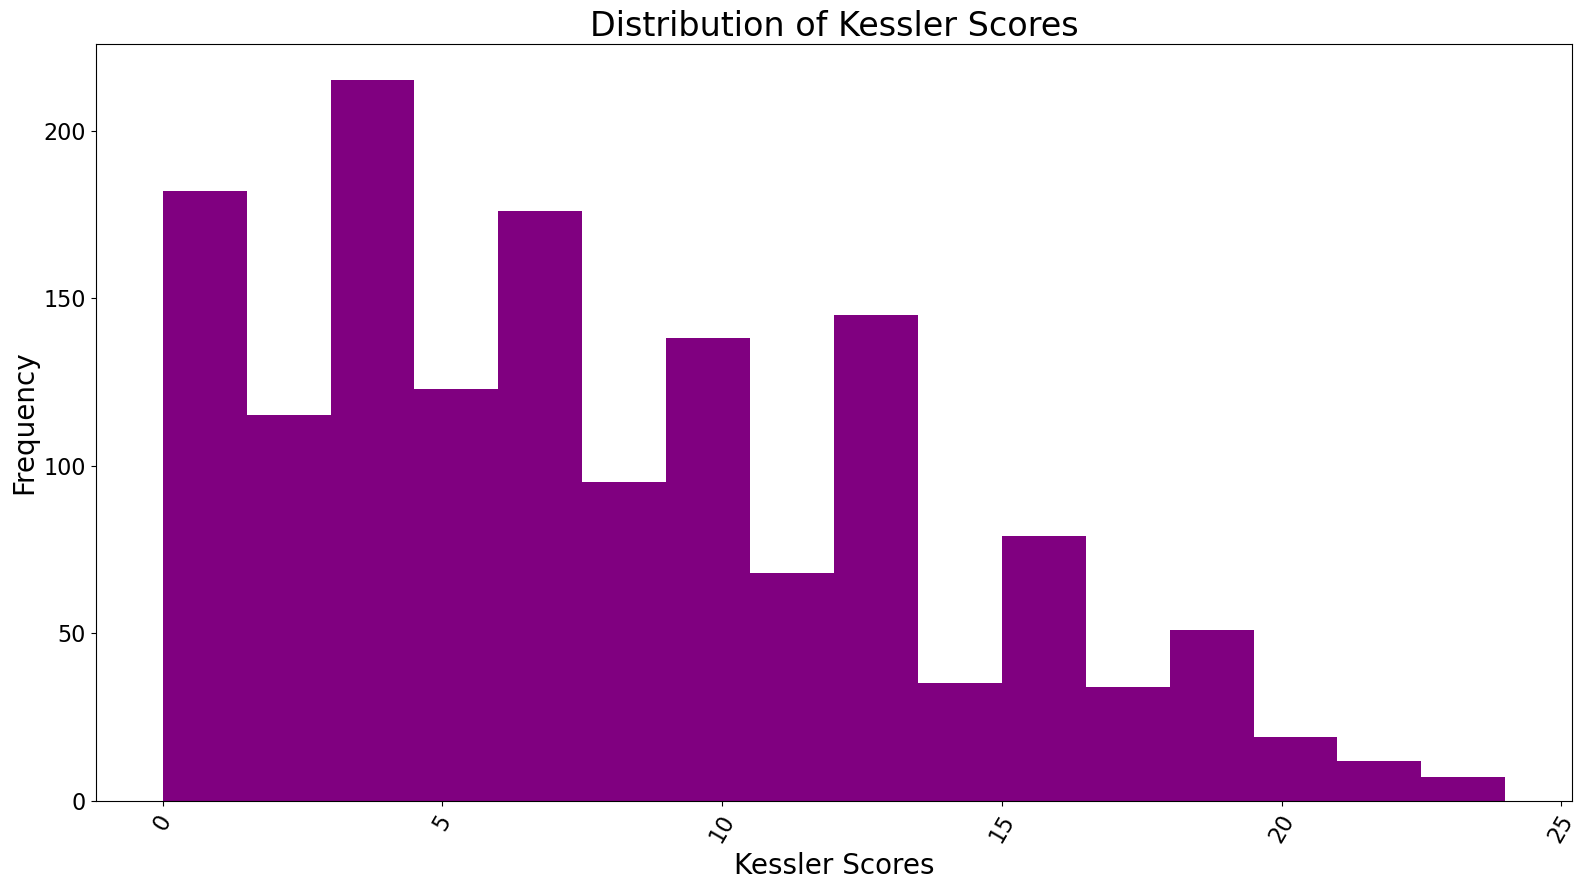

In [89]:
# Plot a histogram of it
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i'], bins = 'auto', color = 'purple');
plt.title(f'Distribution of Kessler Scores', size = 24);
plt.xlabel('Kessler Scores', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);
plt.tight_layout();
plt.savefig(f'../03_images/image_output/{my_date()}_histogram_raw_kessler_wide.png')

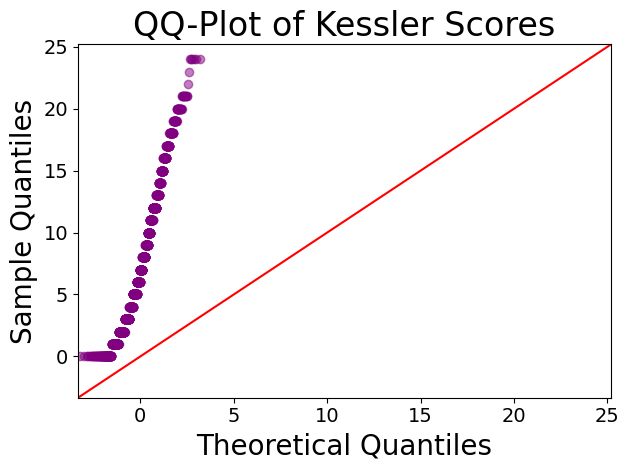

In [90]:
# QQplot of raw kessler
sm.qqplot(meyer['w1kessler6_i'], line='45', alpha = 0.5, 
          markerfacecolor = 'purple', markeredgecolor = 'purple');
plt.title(f'QQ-Plot of Kessler Scores', size = 24);
plt.xlabel('Theoretical Quantiles', size = 20);
plt.ylabel('Sample Quantiles', size = 20);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig(f'../03_images/image_output/{my_date()}_qqplot_raw_kessler.png')

This distribution shows a definite right skew, meaning that most of the participants had low to medium scores (better mental heatlh), but a steady trickle of participants continues into higher numbers too (worse mental health).  The highest observed value was 24, although this scale can go up to 30.

Linear regressions are fairly robust to violations of their assumptions, but it is best practice to try to use normally distributed variables when fitting them.  Therefore, I reviewed several possible transformations of this data, to see if any of them offered improvement.

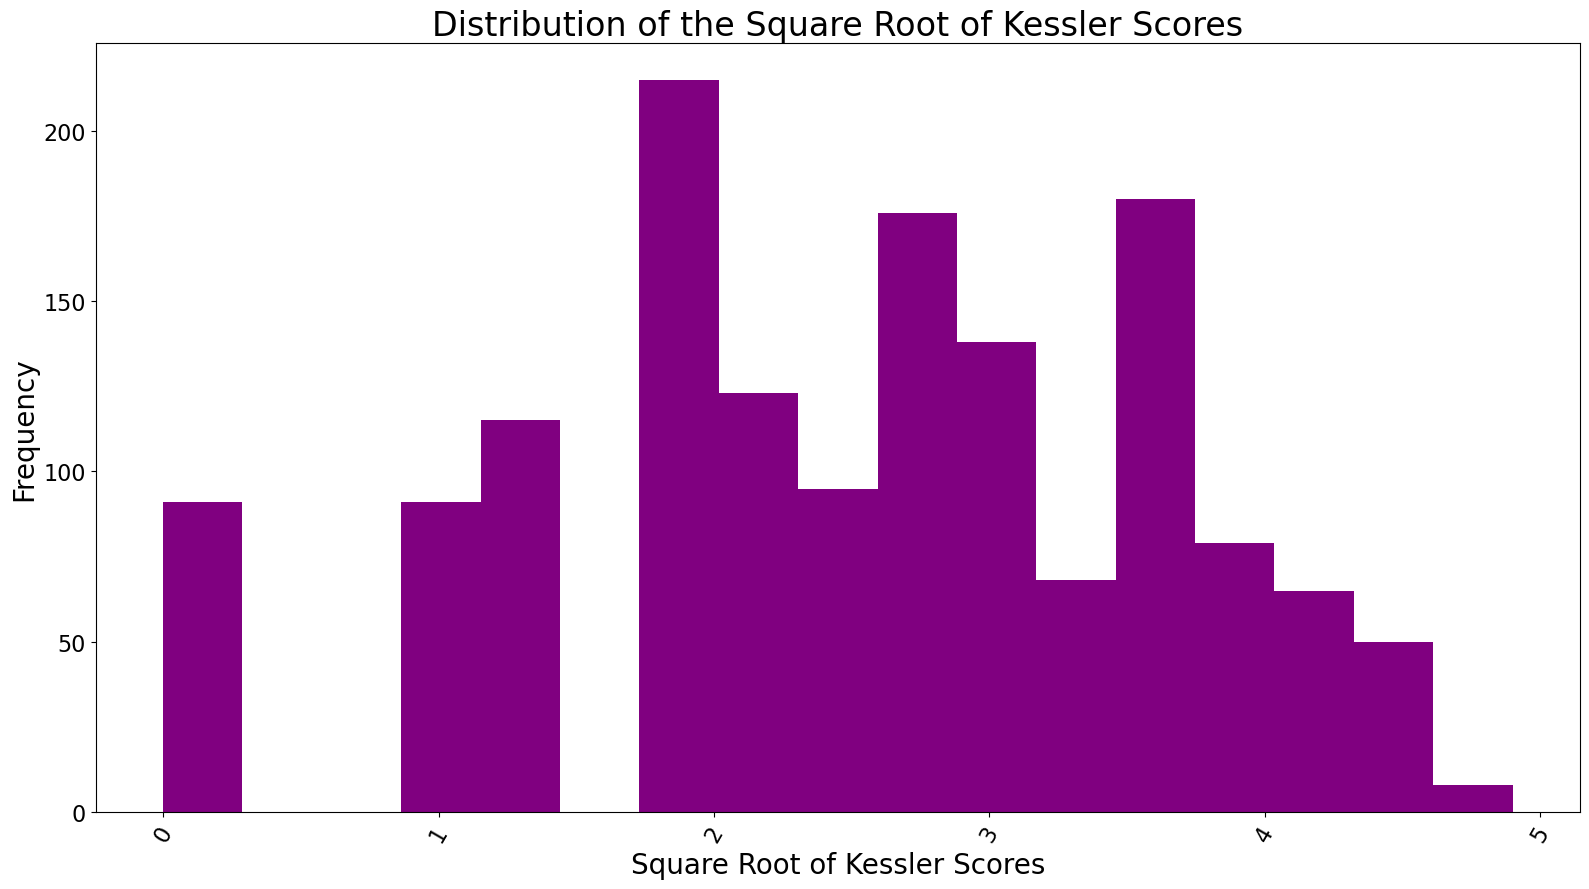

In [91]:
# Plot a histogram of the square root
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i']**(1/2), bins = 'auto', color = 'purple');
plt.title(f'Distribution of the Square Root of Kessler Scores', size = 24);
plt.xlabel('Square Root of Kessler Scores', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);
plt.tight_layout();
plt.savefig(f'../03_images/image_output/{my_date()}_histogram_sqrt_kessler_wide.png')

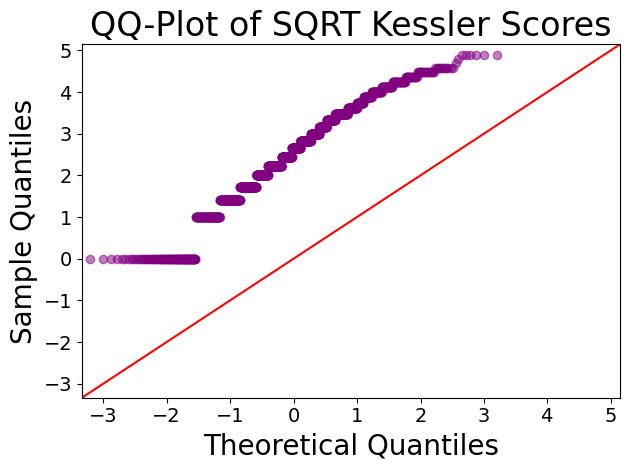

In [85]:
# QQplot of the square root
sm.qqplot((meyer['w1kessler6_i']**0.5), line='45', alpha = 0.5, 
          markerfacecolor = 'purple', markeredgecolor = 'purple');
plt.title(f'QQ-Plot of SQRT Kessler Scores', size = 24);
plt.xlabel('Theoretical Quantiles', size = 20);
plt.ylabel('Sample Quantiles', size = 20);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig(f'../03_images/image_output/{my_date()}_qqplot_sqrt_kessler.png')

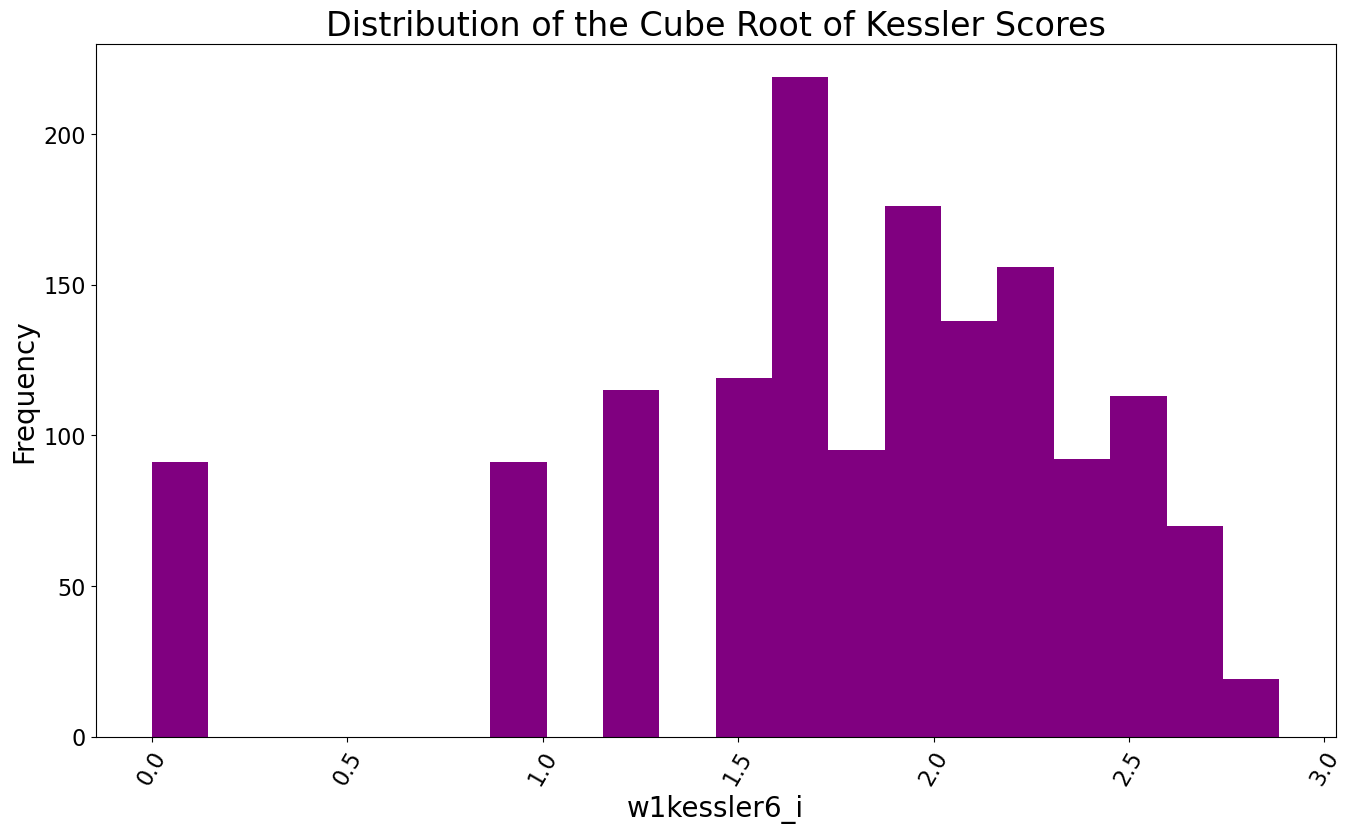

In [82]:
# Plot a histogram of the cube root
plt.figure(figsize = (16, 9));
plt.hist(meyer['w1kessler6_i']**(1/3), bins = 'auto', color = 'purple');
plt.title(f'Distribution of the Cube Root of Kessler Scores', size = 24)
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

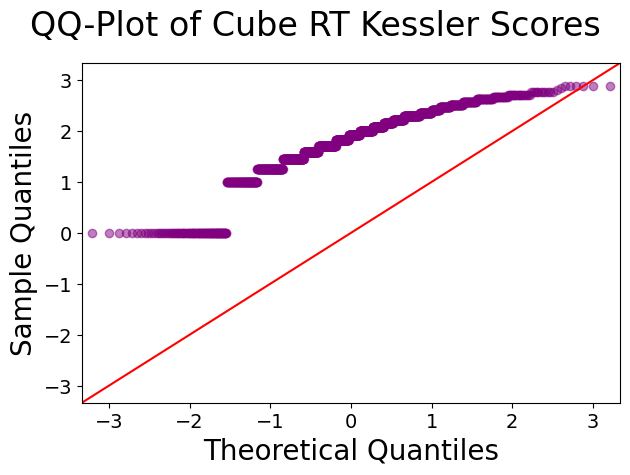

In [61]:
# QQplot of the cube root
sm.qqplot((meyer['w1kessler6_i']**(1/3)), line='45', alpha = 0.5, 
          markerfacecolor = 'purple', markeredgecolor = 'purple');
plt.title(f'QQ-Plot of Cube RT Kessler Scores', size = 24);
plt.xlabel('Theoretical Quantiles', size = 20);
plt.ylabel('Sample Quantiles', size = 20);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.tight_layout();

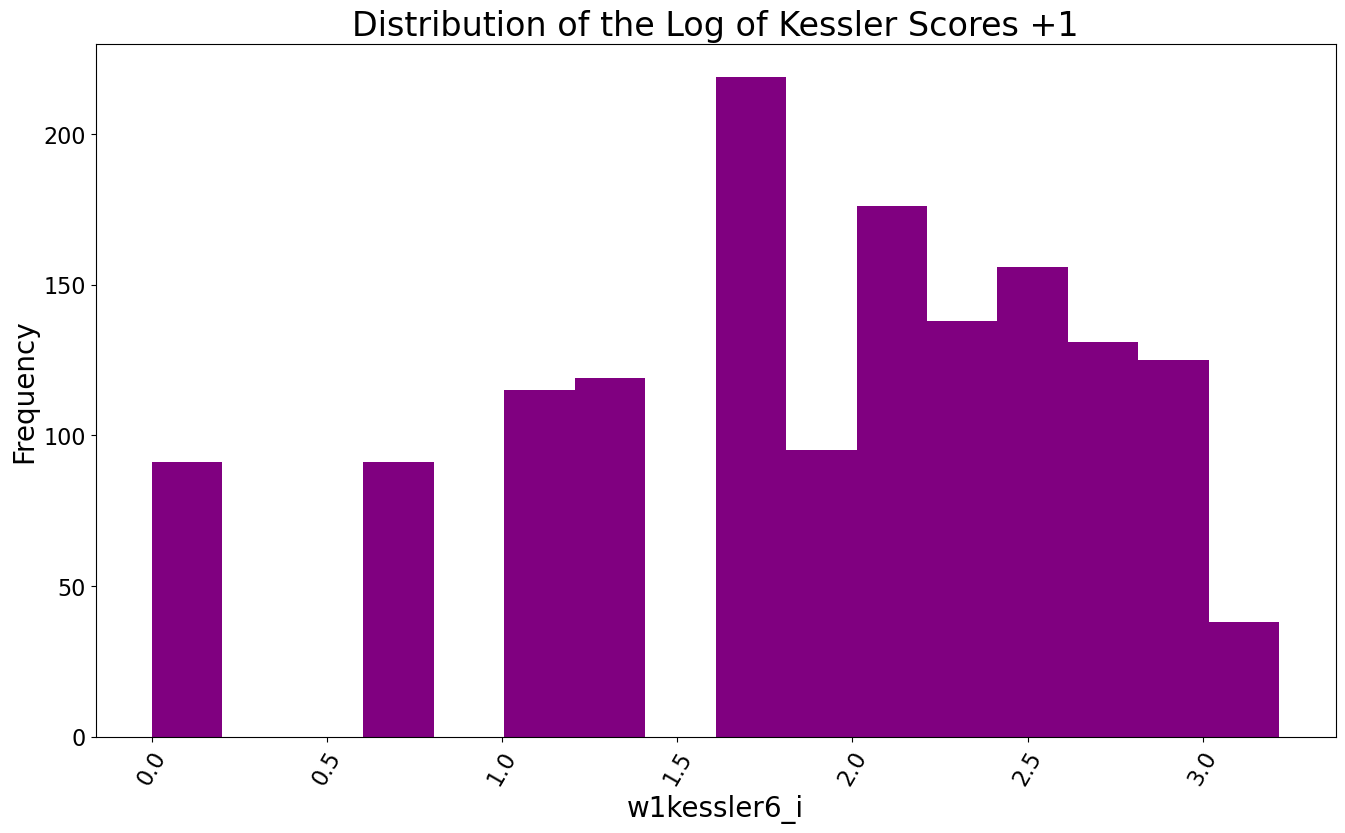

In [87]:
# Plot of a histogram of the +1 log
plt.figure(figsize = (16, 9));
plt.hist(np.log(meyer['w1kessler6_i']+1), bins = 'auto', color = 'purple');
plt.title(f'Distribution of the Log of Kessler Scores +1', size = 24)
plt.xlabel('w1kessler6_i', size = 20);
plt.ylabel('Frequency', size = 20);
plt.xticks(size = 16, rotation = 60);
plt.yticks(size = 16);

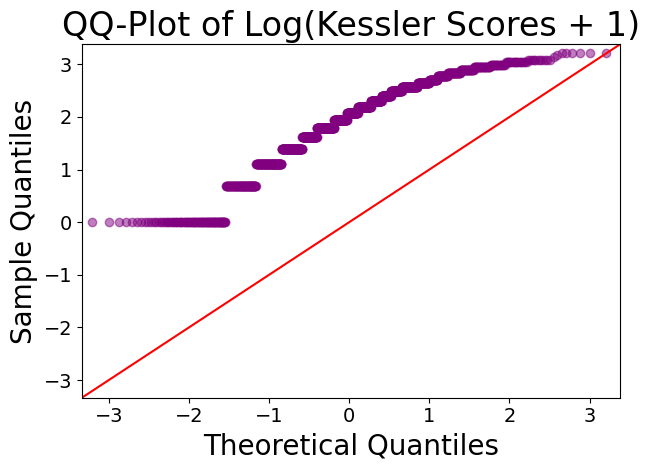

In [88]:
# QQplot of the +1 log
sm.qqplot(np.log(meyer['w1kessler6_i']+1), line='45', alpha = 0.5, 
          markerfacecolor = 'purple', markeredgecolor = 'purple');
plt.title(f'QQ-Plot of Log(Kessler Scores + 1)', size = 24);
plt.xlabel('Theoretical Quantiles', size = 20);
plt.ylabel('Sample Quantiles', size = 20);
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.tight_layout();

None of these transformations get very close to a normal distribution, as the qqplots clearly show.  However, when the square root version of the Kessler scores offers a moderately more normal shape, without any of the obvious distortion that appears in the cube root or log-transformed versions.  The fact that this variable is not normally distributed (nor are many of the [predictor variables](../03_images/01_all_graphs/)) means that I will have to interpret my model cautiously, but is not likely a death knell.

Therefore, I added a new column with the square root transformed version of the Kessler-6 inventory scores.  When fitting my model(s), this will be the target variable.  I also reran the correlations and plots, so that I could review those in relation to this version of the target variable.

In [64]:
# Create a new column with the square root in it. This is my new target variable!
meyer['kessler6_sqrt'] = (meyer['w1kessler6_i']**0.5)

# Reorder the columns
ordered_cols = sorted(list(meyer.columns))
ordered_cols.remove('studyid')
ordered_cols.remove('kessler6_sqrt')
ordered_cols.remove('w1kessler6_i')
ordered_cols = ['studyid', 'w1kessler6_i', 'kessler6_sqrt'] + ordered_cols
ordered_cols

print(f'Everyone accounted for? {meyer.shape[1] == len(ordered_cols)}')

Everyone accounted for? True


In [65]:
meyer = meyer[ordered_cols]
meyer.shape

(1494, 132)

In [66]:
meyer['kessler6_sqrt'].describe()

count    1494.000000
mean        2.528508
std         1.128790
min         0.000000
25%         1.732051
50%         2.645751
75%         3.464102
max         4.898979
Name: kessler6_sqrt, dtype: float64

In [67]:
# Generate a new correlation matrix
meyer_corr = meyer.corr()

# When dealing with large datasets, I find it easier to view the correlation matrix in a CSV
meyer_corr.to_csv('../02_data/meyer_corr_with_sqrt.csv', index = True) # Give it a new name too

# For those who prefer to view it in-text
meyer_corr

studyid  w1kessler6_i  kessler6_sqrt  \
studyid                         1.000000      0.103906       0.097633   
w1kessler6_i                    0.103906      1.000000       0.957793   
kessler6_sqrt                   0.097633      0.957793       1.000000   
abus_treat_non_queer            0.070119      0.216893       0.209574   
abus_treat_sex_gender           0.009527      0.150637       0.153710   
abusive_treatment               0.000728      0.221233       0.219036   
bad_neighbhd                    0.016558      0.195985       0.196664   
childhd_bullying_non_queer      0.049385      0.285710       0.275189   
childhd_bullying_sex_gender     0.027719      0.182663       0.184512   
chronic_strain                  0.074053      0.525705       0.518450   
cohort                         -0.104267     -0.367859      -0.391717   
daily_discr_non_queer           0.154620      0.209677       0.206602   
daily_discr_sex_gender          0.031268      0.271463       0.272955   
disabled                        0.020363      0.369491       0.360982   
gcendiv                         0.047454     -0.019954      -0.020230   
gcenreg                         0.052533     -0.031340      -0.032762   
geduc1                         -0.026410     -0.291846      -0.277958   
geduc2                         -0.003236     -0.185275      -0.175965   
geducation                     -0.020769     -0.277191      -0.262362   
gmilesaway2_ei_r                0.051560     -0.059816      -0.042702   
gurban_i                        0.041714     -0.059474      -0.046496   
health_insurance               -0.054009     -0.063635      -0.062520   
housing_disc_non_queer         -0.013457      0.076458       0.060406   
housing_disc_sex_gender        -0.029607      0.075917       0.067440   
outness                        -0.015169     -0.188888      -0.213667   
screen_race                     0.436294      0.096424       0.093150   
serious_health_cond            -0.074542     -0.024718      -0.016285   
stress_past_year_crime          0.012945      0.152831       0.134253   
stress_past_year_gen            0.120155      0.321832       0.317451   
stress_past_year_interpersonal  0.074034      0.311920       0.302141   
stress_past_year_non_queer      0.086263      0.253042       0.235809   
stress_past_year_sex_gender     0.088783      0.171219       0.163495   
stress_past_year_work           0.097185      0.240119       0.238750   
suicidality                     0.037701      0.486531       0.462074   
w1ace_emo_i                     0.034630      0.217761       0.233511   
w1ace_i                         0.080653      0.259967       0.251323   
w1ace_inc_i                     0.120545      0.158499       0.149986   
w1ace_ipv_i                     0.050567      0.126174       0.117683   
w1ace_men_i                    -0.016430      0.239890       0.237487   
w1ace_phy_i                     0.012412      0.142650       0.136533   
w1ace_sep_i                     0.040752      0.115438       0.103150   
w1ace_sex_i                     0.091481      0.085953       0.071024   
w1ace_sub_i                     0.059729      0.113764       0.110257   
w1age                          -0.106230     -0.365917      -0.391032   
w1auditc_i                     -0.048187     -0.001916      -0.001069   
w1childgnc_i                    0.015830      0.004413       0.012567   
w1connectedness_i               0.122747      0.009146       0.011887   
w1conversion                    0.026485      0.033091       0.032760   
w1conversionhc                 -0.004629     -0.027143      -0.017951   
w1conversionrel                 0.025024      0.066962       0.062733   
w1dudit_i                       0.083365      0.217928       0.219734   
w1everyday_i                    0.116535      0.478825       0.459891   
w1feltstigma_i                  0.020497      0.211140       0.206724   
w1gender                       -0.032281      0.098026       0.097161   
w1hcthreat_i      

In [68]:
# Identify the best correlates - positive
meyer_corr.sort_values(by = 'kessler6_sqrt', ascending = False)

studyid  w1kessler6_i  kessler6_sqrt  \
kessler6_sqrt                   0.097633      0.957793       1.000000   
w1kessler6_i                    0.103906      1.000000       0.957793   
w1q72_ei                        0.093322      0.712755       0.674666   
chronic_strain                  0.074053      0.525705       0.518450   
w1q03_ei                        0.074818      0.475437       0.462709   
suicidality                     0.037701      0.486531       0.462074   
w1everyday_i                    0.116535      0.478825       0.459891   
w1q119_ei                       0.027434      0.397033       0.396642   
disabled                        0.020363      0.369491       0.360982   
stress_past_year_gen            0.120155      0.321832       0.317451   
stress_past_year_interpersonal  0.074034      0.311920       0.302141   
w1weight_full                   0.021940      0.288530       0.282803   
childhd_bullying_non_queer      0.049385      0.285710       0.275189   
w1sexminid                      0.032715      0.260960       0.273356   
daily_discr_sex_gender          0.031268      0.271463       0.272955   
w1ace_i                         0.080653      0.259967       0.251323   
stress_past_year_work           0.097185      0.240119       0.238750   
w1ace_men_i                    -0.016430      0.239890       0.237487   
stress_past_year_non_queer      0.086263      0.253042       0.235809   
w1ace_emo_i                     0.034630      0.217761       0.233511   
w1hcthreat_i                    0.038353      0.216954       0.225686   
w1sexualid                      0.033376      0.213416       0.224392   
w1poverty_i_ei                  0.033676      0.252827       0.223038   
w1q175_ei                       0.066736      0.216494       0.221293   
w1dudit_i                       0.083365      0.217928       0.219734   
abusive_treatment               0.000728      0.221233       0.219036   
abus_treat_non_queer            0.070119      0.216893       0.209574   
w1feltstigma_i                  0.020497      0.211140       0.206724   
daily_discr_non_queer           0.154620      0.209677       0.206602   
bad_neighbhd                    0.016558      0.195985       0.196664   
w1q74_23_ei                     0.014447      0.212496       0.196312   
w1q171_7_ei                     0.044250      0.168169       0.191501   
childhd_bullying_sex_gender     0.027719      0.182663       0.184512   
stress_past_year_sex_gender     0.088783      0.171219       0.163495   
w1q36_ei                        0.023496      0.153050       0.162649   
w1internalized_i                0.039330      0.138417       0.155010   
abus_treat_sex_gender           0.009527      0.150637       0.153710   
w1ace_inc_i                     0.120545      0.158499       0.149986   
w1ace_phy_i                     0.012412      0.142650       0.136533   
work_disc_non_queer             0.023757      0.145423       0.135201   
stress_past_year_crime          0.012945      0.152831       0.134253   
w1q171_2_ei                     0.035786      0.105852       0.123452   
w1ace_ipv_i                     0.050567      0.126174       0.117683   
w1q30_4_ei                     -0.006128      0.123951       0.114404   
w1ace_sub_i                     0.059729      0.113764       0.110257   
w1q140_ei                       0.017340      0.116788       0.106673   
work_neg_outcomes               0.024897      0.110214       0.104173   
w1q30_2_ei                      0.008782      0.094932       0.103787   
w1ace_sep_i                     0.040752      0.115438       0.103150   
w1q171_9_ei                    -0.060398      0.108269       0.100065   
work_disc_sex_gender            0.021003      0.103663       0.098904   
studyid                         1.000000      0.103906       0.097633   
w1gender                       -0.032281      0.098026       0.097161   
w1q143_7_ei                     0.043002      0.101901       0.096817   
w1q145_7_ei       

In [69]:
# Identify the best correlates - negative
meyer_corr.sort_values(by = 'kessler6_sqrt', ascending = True)

studyid  w1kessler6_i  kessler6_sqrt  \
w1lifesat_i                    -0.089173     -0.525031      -0.519910   
w1q01_ei                       -0.045544     -0.507901      -0.495633   
w1socialwb_i                   -0.119839     -0.494476      -0.466944   
w1pinc_i                       -0.061955     -0.403028      -0.413744   
cohort                         -0.104267     -0.367859      -0.391717   
w1age                          -0.106230     -0.365917      -0.391032   
w1hinc_i                       -0.057597     -0.338203      -0.325115   
w1povertycat_i_ei              -0.063915     -0.348310      -0.320335   
w1q162_ei                      -0.008722     -0.300843      -0.311549   
geduc1                         -0.026410     -0.291846      -0.277958   
geducation                     -0.020769     -0.277191      -0.262362   
w1socsupport_i                 -0.039249     -0.246074      -0.237315   
w1q33_ei                       -0.055828     -0.215486      -0.232351   
w1socsupport_fam_i             -0.029786     -0.233671      -0.224453   
outness                        -0.015169     -0.188888      -0.213667   
w1socsupport_fr_i              -0.038420     -0.210511      -0.200905   
w1q171_1_ei                    -0.042808     -0.191669      -0.194301   
geduc2                         -0.003236     -0.185275      -0.175965   
w1q52_ei                       -0.089860     -0.159361      -0.165189   
w1socsupport_so_i              -0.028389     -0.157687      -0.154784   
w1q69_ei                       -0.089525     -0.164011      -0.153439   
w1q179_ei_r_relig_christ        0.020940     -0.116649      -0.137484   
waveparticipated               -0.354735     -0.146066      -0.129677   
w1q38_ei                       -0.048573     -0.117994      -0.128599   
w1q37_ei                       -0.024446     -0.126279      -0.128236   
w1q171_8_ei                    -0.015795     -0.100069      -0.106755   
w1meim_i                        0.155726     -0.109922      -0.106045   
w1sex                          -0.031995     -0.112492      -0.101647   
w1q180_ei_r_relig_christ        0.023023     -0.098239      -0.101196   
w1q89_ei                       -0.007643     -0.125798      -0.100704   
w1q65_ei                       -0.096361     -0.107395      -0.096819   
w1q78_ei                       -0.090268     -0.092261      -0.091485   
w1q74_21_ei                    -0.006204     -0.066075      -0.069407   
w1q171_3_ei                    -0.007343     -0.063733      -0.066995   
w1q181_ei_r                     0.088517     -0.072724      -0.065436   
health_insurance               -0.054009     -0.063635      -0.062520   
w1q141_7_ei                    -0.051607     -0.034805      -0.050926   
gurban_i                        0.041714     -0.059474      -0.046496   
gmilesaway2_ei_r                0.051560     -0.059816      -0.042702   
w1q79_ei                       -0.078819     -0.049579      -0.041918   
w1q167_ei                       0.036513     -0.038985      -0.039293   
gcenreg                         0.052533     -0.031340      -0.032762   
w1q166_ei                       0.032478     -0.028813      -0.028345   
gcendiv                         0.047454     -0.019954      -0.020230   
w1q168_ei                      -0.097763     -0.013645      -0.019827   
w1conversionhc                 -0.004629     -0.027143      -0.017951   
serious_health_cond            -0.074542     -0.024718      -0.016285   
w1q74_22_ei                     0.009571     -0.032830      -0.014770   
w1q136_7_ei                    -0.038297     -0.024883      -0.013835   
w1auditc_i                     -0.048187     -0.001916      -0.001069   
w1q139_7_ei                     0.013657      0.008289       0.007910   
w1connectedness_i               0.122747      0.009146       0.011887   
w1childgnc_i                    0.015830      0.004413       0.012567   
w1q34_ei                       -0.015805      0.030583       0.026132   
w1q30_5_ei        

In [70]:
# Generate new plots
autoplots(meyer, 'kessler6_sqrt', transform = True, verbose = False, folder = '../03_images/image_output');

# Tell me when it's done; this function can take a minute
print("All done!")
os.listdir('../03_images/image_output') # Should show a folder with a time stamp around when the function was run

All done!


['plots_2024-06-10_h23-m00-s19',
 'plots_2024-06-12_h14-m24-s58',
 'plots_2024-06-12_h14-m28-s06',
 'README.md']

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

## Notebook Summary

In this notebook, I conducted exploratory data analysis to be better informed for modeling, and discovered that my target variable was not normally distributed.  I attempted to remedy this issue by created a square root transformed version of it, which I will use as the target variable in modeling.

In the following notebook, I will complete my modeling.

Any readers who are following along or attempting to reproduce my work should use the cell below to save a copy of the dataframe as it exists now.  A cell is provided at the top of the next notebook in which to import that copy.

In [71]:
# Save a copy of the updated dataframe to use in the next notebook
meyer.to_csv('../02_data/df_after_eda.csv', index = False)